In [19]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import LinearRegression

In [20]:
df = pd.read_csv("Dataset/Close.csv")
df.head()

,Close day 1,Close day 2,Close day 3,Close day 4,Close day 5,Close day 6,Close day 7,y
0,0.128348,0.121652,0.112723,0.115513,0.118862,0.126116,0.132254,0.137835
1,0.121652,0.112723,0.115513,0.118862,0.126116,0.132254,0.137835,0.145089
2,0.112723,0.115513,0.118862,0.126116,0.132254,0.137835,0.145089,0.158482
3,0.115513,0.118862,0.126116,0.132254,0.137835,0.145089,0.158482,0.160714
4,0.118862,0.126116,0.132254,0.137835,0.145089,0.158482,0.160714,0.156808


0.9988348983933458
0.9988349146248281
0.9988347880811608


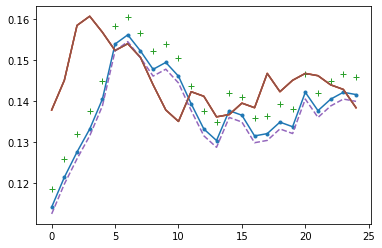

In [44]:
X_Close = df.iloc[:, 4:5].values
Y_Close = df.iloc[: , -1].values
#######################################################################################################################################
##################################################>>>> LASSO ALGORITHM <<##############################################################
Lasso = linear_model.Lasso(alpha=0.1)
Lasso.fit(X_Close, Y_Close)

Lasso_Close = Lasso.predict(X_Close)

PredictCloseLine_Lasso = [n for n in range(Lasso_Close.shape[0])]
Final_Lasso = plt.plot(PredictCloseLine_Lasso[:25], Lasso_Close[:25], '.-', PredictCloseLine_Lasso[:25], Y_Close[:25])
#######################################################################################################################################
##################################################>>>> HUBER ALGORITHM <<<<############################################################
Huber = HuberRegressor().fit(X_Close, Y_Close)
  
Huber_Close = Huber.predict(X_Close)

PredictCloseLine_Huber = [n for n in range(Huber_Close.shape[0])]

Final_Huber = plt.plot(PredictCloseLine_Huber[:25], Huber_Close[:25], '+', PredictCloseLine_Huber[:25], Y_Close[:25])
####################################################################################################################################### 
##################################################>>>> LINEAR ALGORITHM <<<<############################################################
Linear = LinearRegression().fit(X_Close, Y_Close)

Linear_Close = Linear.predict(X_Close)

PredictCloseLine_Linear = [n for n in range(Linear_Close.shape[0])]

Final_Linear = plt.plot(PredictCloseLine_Linear[:25], Linear_Close[:25], '--', PredictCloseLine_Linear[:25], Y_Close[:25])
#######################################################################################################################################
print(Lasso.score(X_Close,Y_Close))
print(Linear.score(X_Close,Y_Close))
print(Huber.score(X_Close,Y_Close))

In [46]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(X_Close, Y_Close)

0.3072415489077905